In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

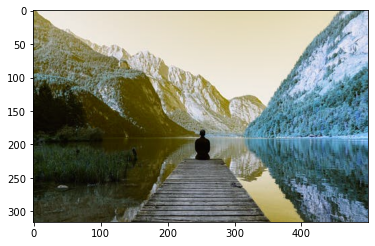

In [2]:
image_name = "landscape.jpeg"
img = cv2.imread(image_name)
img_copy = img.copy()
plt.imshow(img) # Leaving uncorrected

In [3]:
marker = np.zeros(img.shape[:2], dtype=np.int32)

In [4]:
new_img = np.zeros(img.shape, dtype=np.int8)

In [5]:
from matplotlib import cm
colors = [tuple(np.array(cm.tab10(i)[:3]) * 255) for i in range(10)]

In [6]:
current_marker = 1
marks_updated = False
num_markers = 10

In [7]:
def mouse_callback(event, x, y, flags, param):
  global marks_updated

  if event == cv2.EVENT_LBUTTONDOWN:
    cv2.circle(marker, (x, y), 10,(current_marker), -1)

    cv2.circle(img, (x, y), 10, colors[current_marker], -1)

    marks_updated = True

In [ ]:
cv2.namedWindow("Watershed Segmentation")
cv2.setMouseCallback("Watershed Segmentation", mouse_callback)

while True:
  cv2.imshow("Watershed Results", new_img)
  cv2.imshow("Watershed Segmentation", img)

  key = cv2.waitKey(1)
  if key == 27:
    break
 
  elif key == ord('c'):
    img = img_copy.copy()
    marker = np.zeros(img.shape[:2], dtype=np.int32)
    new_img = np.zeros(img.shape, dtype=np.int8)
  
  elif key > 0 and chr(key).isdigit():
    current_marker = int(chr(key))

  if marks_updated:
    marker_copy = marker.copy()
    cv2.watershed(img_copy, marker_copy)

    new_img = np.zeros(img.shape, dtype=np.int8)

    for i in range(num_markers):
      new_img[marker_copy == (i)] = colors[i]


cv2.destroyAllWindows()